In [1]:
import time
import matplotlib.pyplot as plt
import AWARE_functions
import matplotlib.dates as mdates

In [2]:
#TODO 
#insert manual table with device IDs for now
#generate HTML of plots
#fix after location table is back: locationDataFrame = sara.getLocationDataFrame('a7d5a733-2b75-41a0-b6ad-a86121356122',7)

In [11]:
%%javascript
//toggle scrolling for jupyter notebooks.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
#get IDs of all AWARE users
sara = AWARE_functions.Aware("./saraSqlConfig.json")
aware = AWARE_functions.Aware("./awareSqlConfig.json")
ID_dict = sara.getAwareIDs()
print(ID_dict)

{'88315702-a3e6-4296-8437-0a56b4c4f03b': 'mash_aya', '76c46cd4-670f-453a-93f3-8c45b629c31f': 'murphy_aya', 'de8857ae-0ed1-4eb2-8efc-b6a2aad70ad2': 'frank_aya'}


In [8]:
#these are the aware IDs in the AWARE DB. Above in the ones in the HarvardDev DB.
ID_list2 = aware.getAwareIDs2()
print(ID_list2)

#Auxilary list here in case not all IDs in the user table
#Overwrites one from above; please delete/comment out if the users table is up to date
ID_dict = {
    '36c38a8d-c6d7-48a7-88a5-5f9796b540b6':'Mash',
    '7134c8fb-07e9-4075-b3a9-8a0443f9d7a7':'someone',
    '28b8526c-3666-4baf-9a71-6896e836961e':'Philip',
    '38ce91a4-0cb5-43bf-9e35-60da0202662a':'Eura',
    'f106b7a4-3bc6-4ff7-9152-07e58edbbc23':'Sarah',
    'dc9a9420-bb22-40a3-8285-6e73594e88b8':'Chloe',
    'b39a842a-9a42-4ef0-aa3f-8a9c2ff6c018':'Susan',
    '03cb49f6-d9ff-4338-94b8-b16d37831dbc': 'Frank'}

[('36c38a8d-c6d7-48a7-88a5-5f9796b540b6',), ('7134c8fb-07e9-4075-b3a9-8a0443f9d7a7',), ('28b8526c-3666-4baf-9a71-6896e836961e',), ('38ce91a4-0cb5-43bf-9e35-60da0202662a',), ('f106b7a4-3bc6-4ff7-9152-07e58edbbc23',), ('03cb49f6-d9ff-4338-94b8-b16d37831dbc',), ('dc9a9420-bb22-40a3-8285-6e73594e88b8',), ('b39a842a-9a42-4ef0-aa3f-8a9c2ff6c018',)]


In [9]:
#date of last update by user 
aware.last_update_table(ID_dict)

,last_update
username,
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-16 23:51:36
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-17 16:59:39
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-19 14:06:43
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-20 01:14:51
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-20 01:36:08
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-20 15:44:00
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-20 18:50:26
"(Mash, someone, Philip, Eura, Sarah, Chloe, Susan, Frank)",2020-12-20 20:34:41


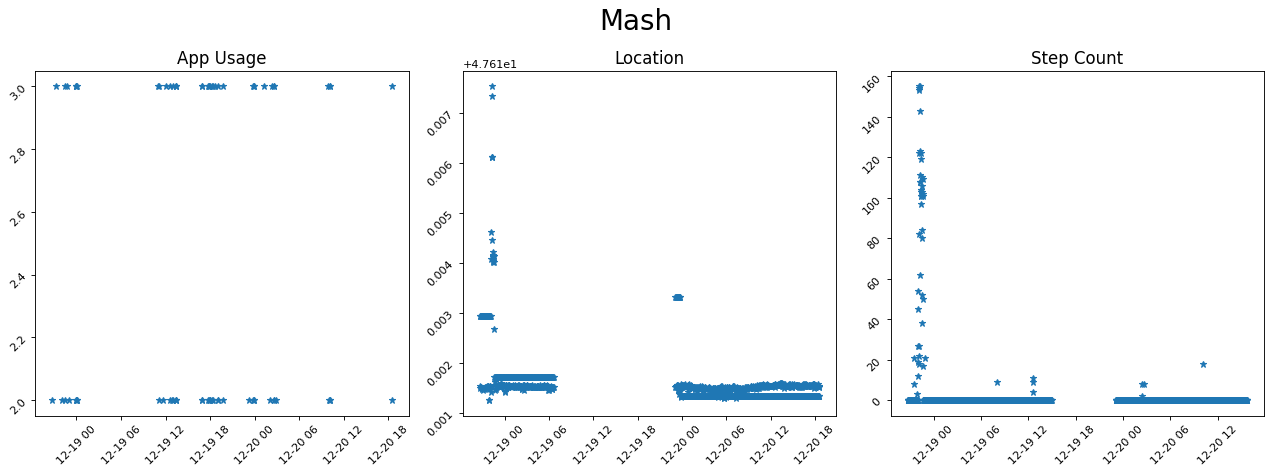

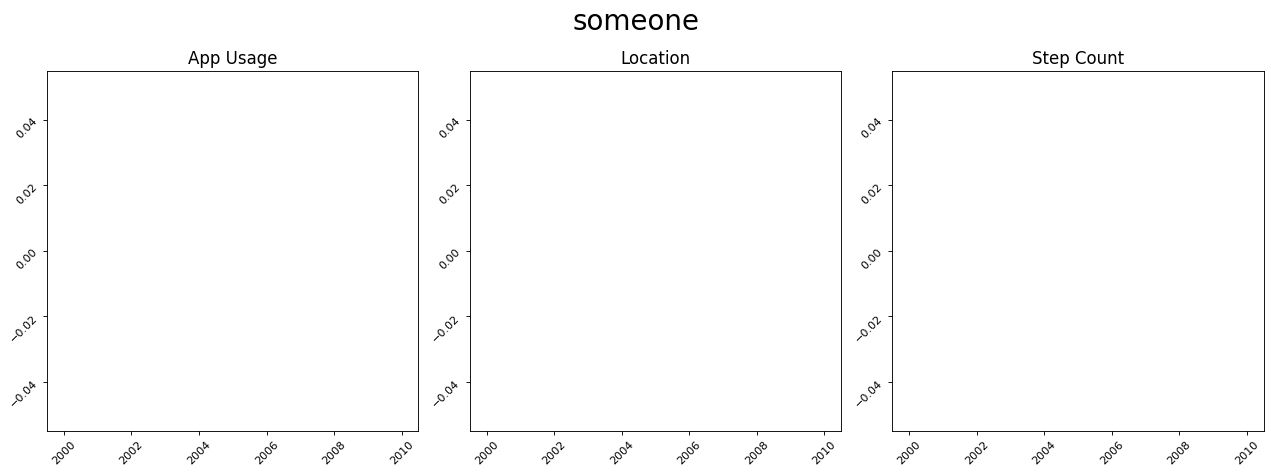

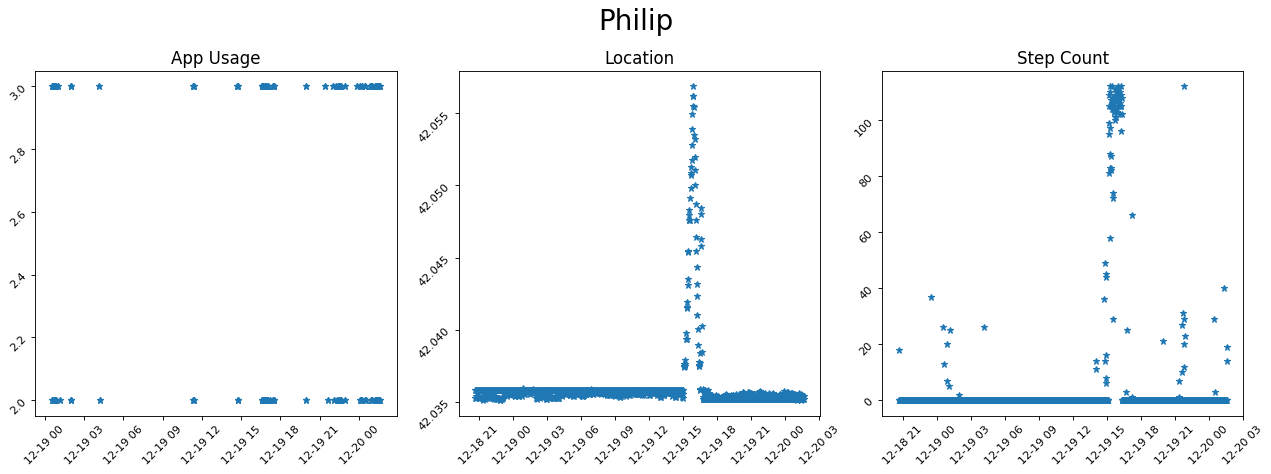

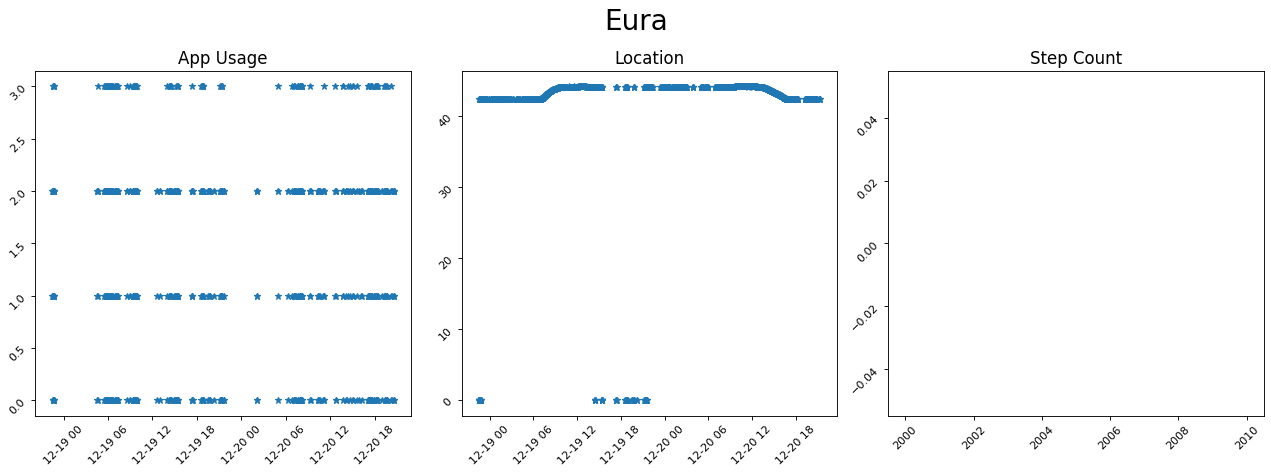

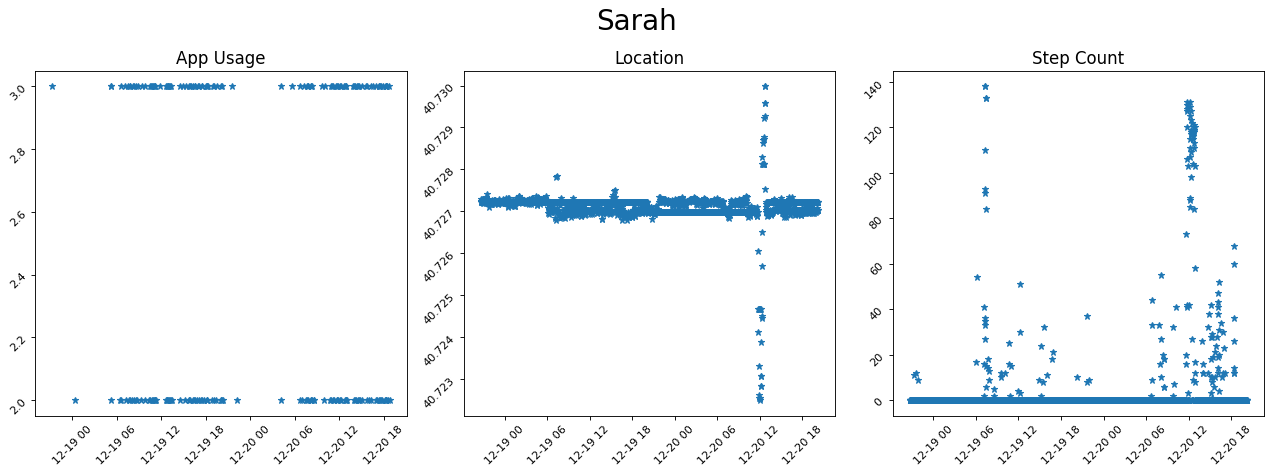

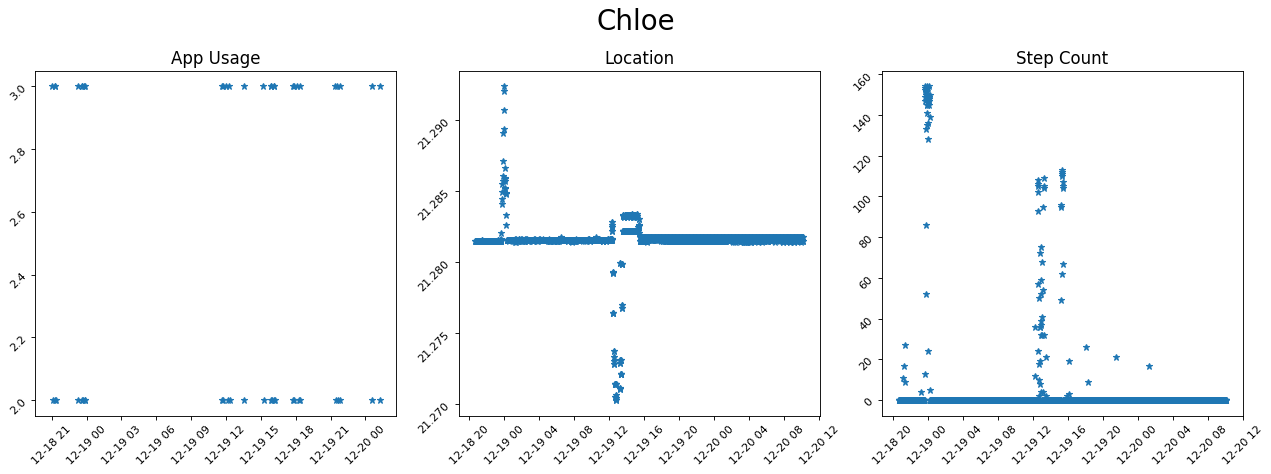

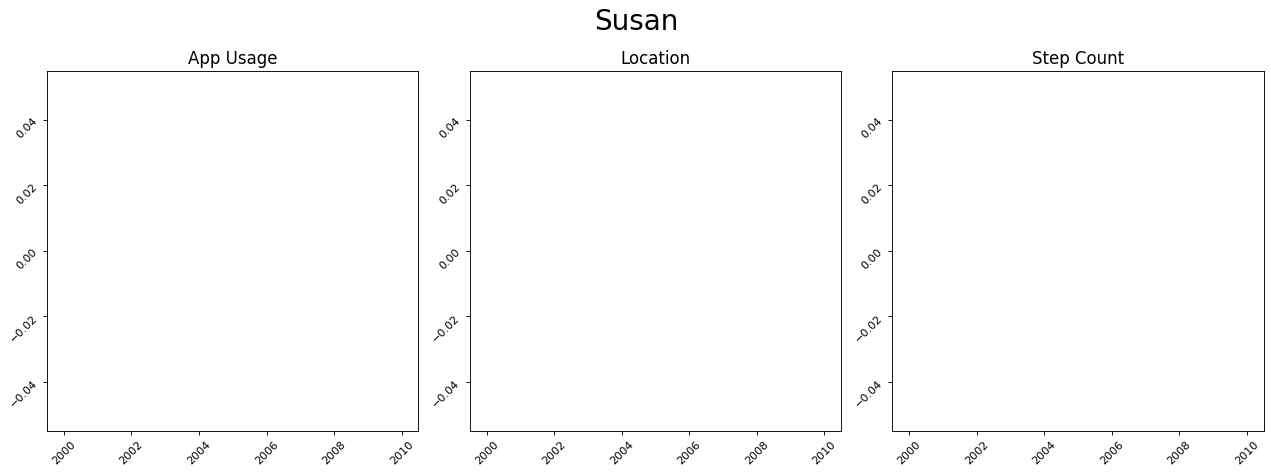

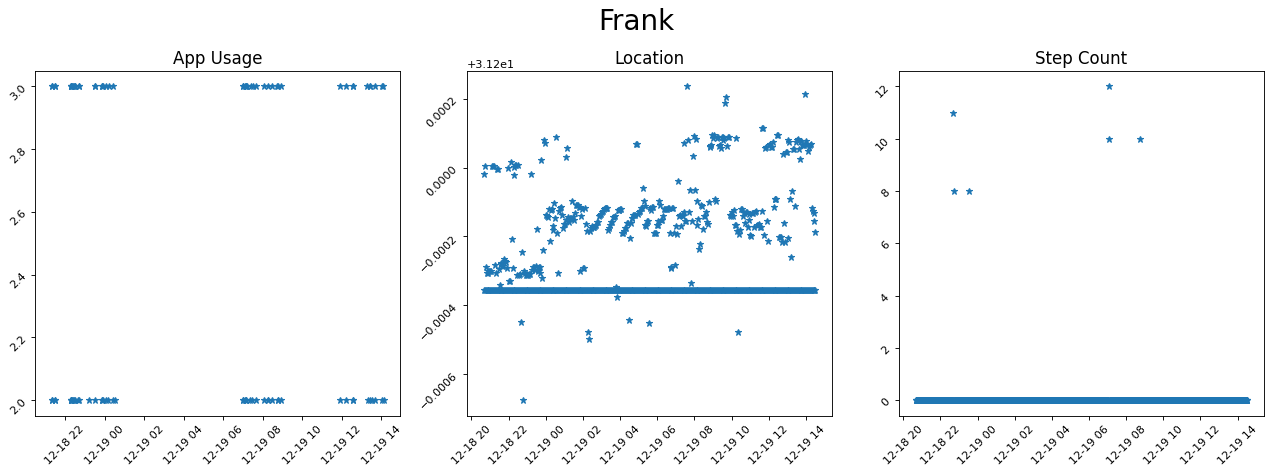

In [10]:
#Last 2 days

days = 2
for ID in ID_dict.keys():
    try:
        name = ID_dict[ID]
    except:
        name = "unknown"
    
    fig,ax = plt.subplots(1,3,figsize=(16, 6), dpi=80)
    fig.suptitle(name, fontsize = 25 )
    appUsageDataFrame = aware.getScreenUsageDataFrame(ID,days)
    locationDataFrame = aware.getLocationDataFrame(ID,2)
    stepCountDataFrame = aware.getStepCountDataFrame(ID,days)
    
    ax[0].plot(appUsageDataFrame['date'], appUsageDataFrame['screenTime'], '*')
    ax[0].set_title('App Usage',fontsize=15)
    ax[0].tick_params(labelrotation=45)   
    
    ax[1].plot(locationDataFrame['date'], locationDataFrame['location_lat'], '*')
    ax[1].set_title('Location',fontsize=15)
    ax[1].tick_params(labelrotation=45)
    ax[1].format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    ax[2].plot(stepCountDataFrame['date'], stepCountDataFrame['stepCount'], '*')
    ax[2].set_title('Step Count',fontsize=15)
    ax[2].tick_params(labelrotation=45)
    ax[2].format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    plt.tight_layout()
    plt.show()

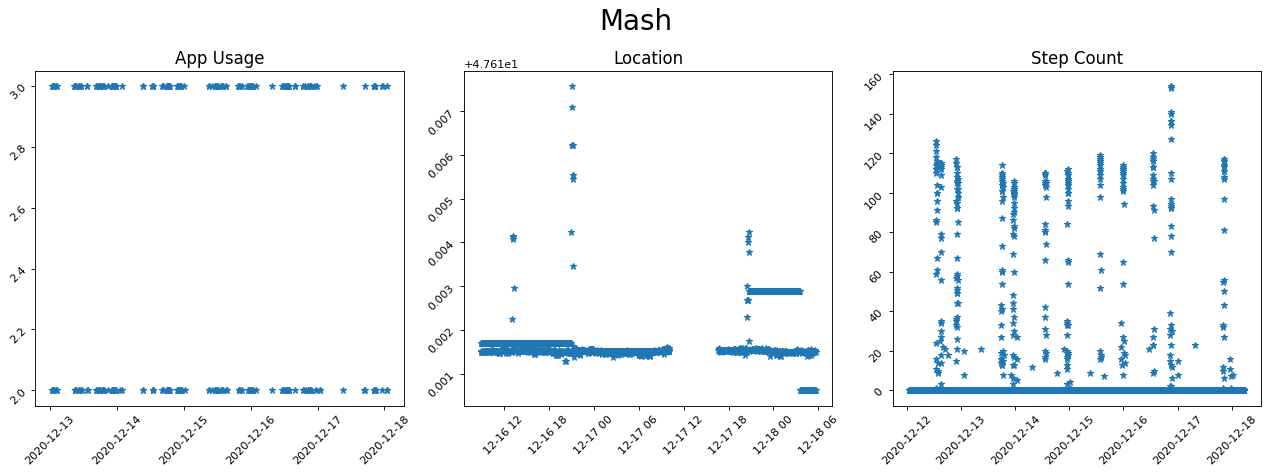

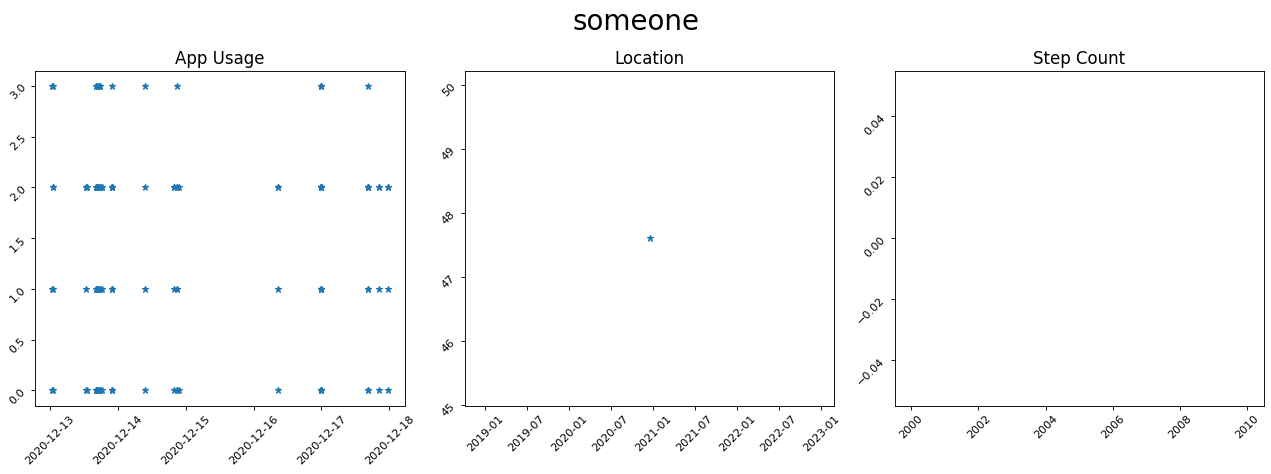

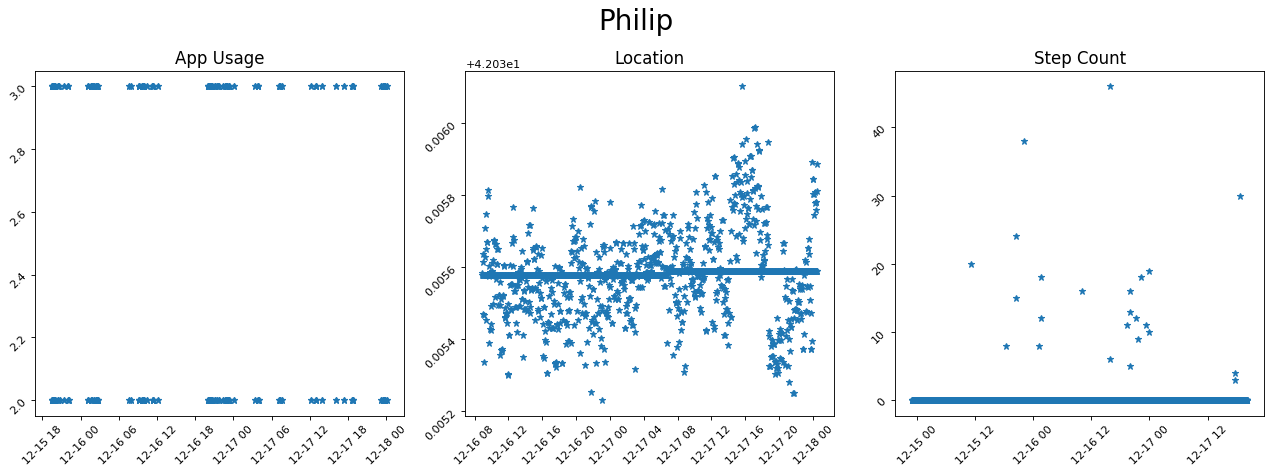

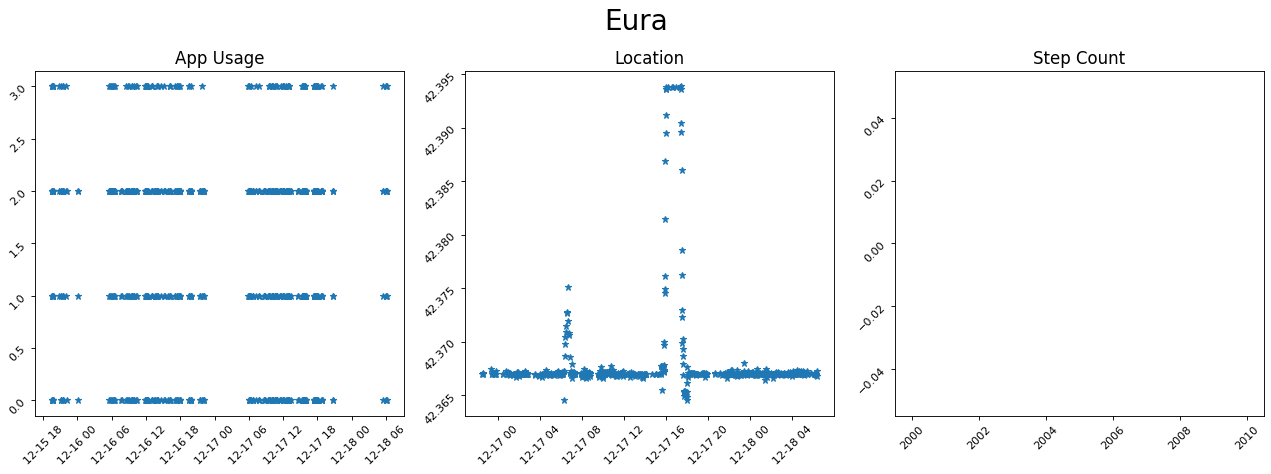

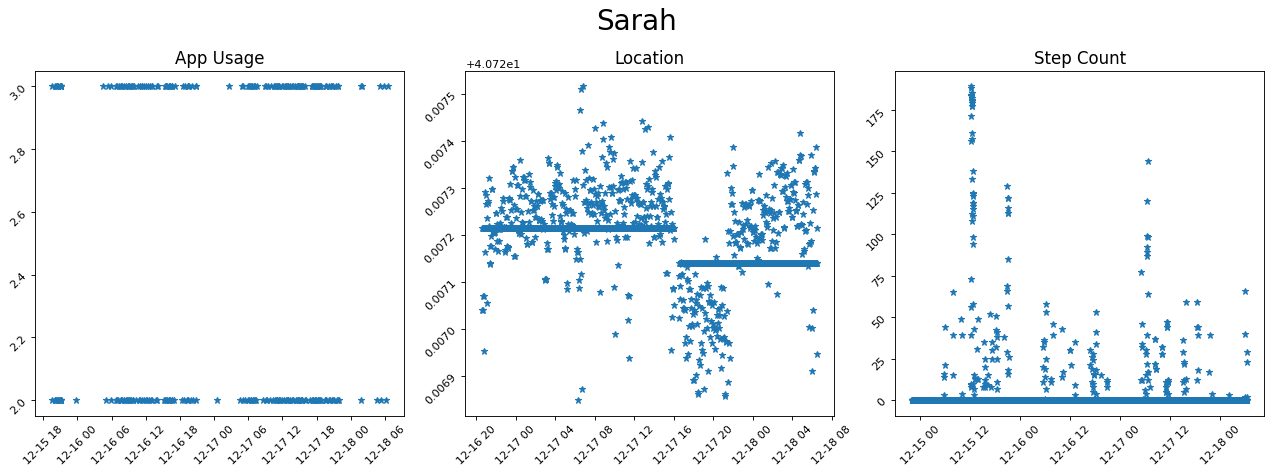

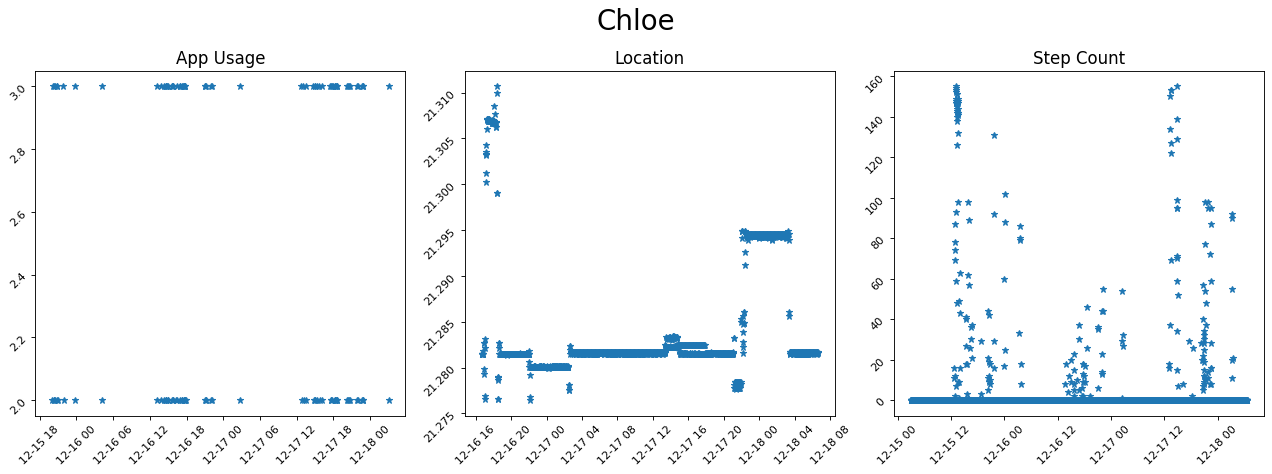

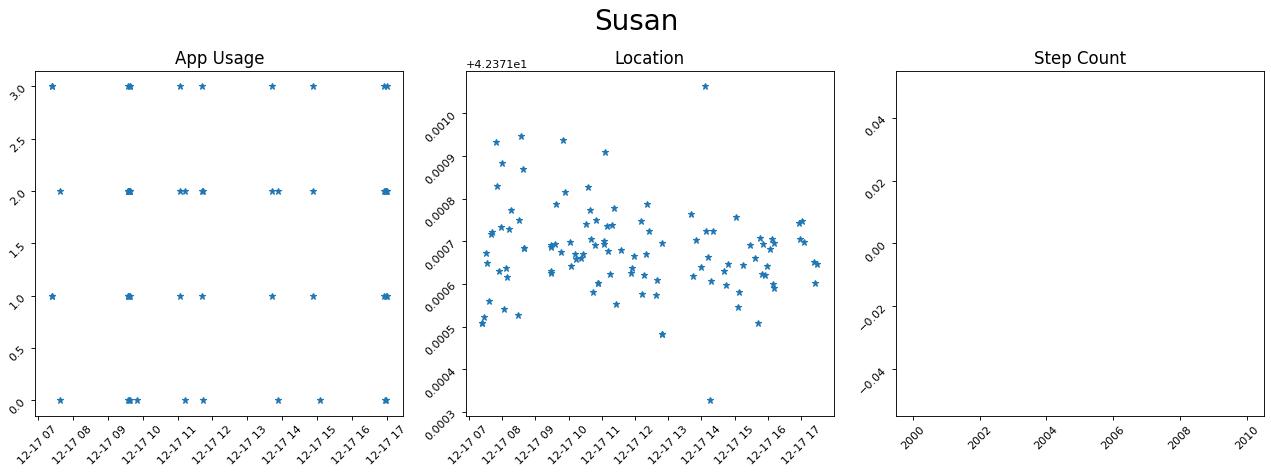

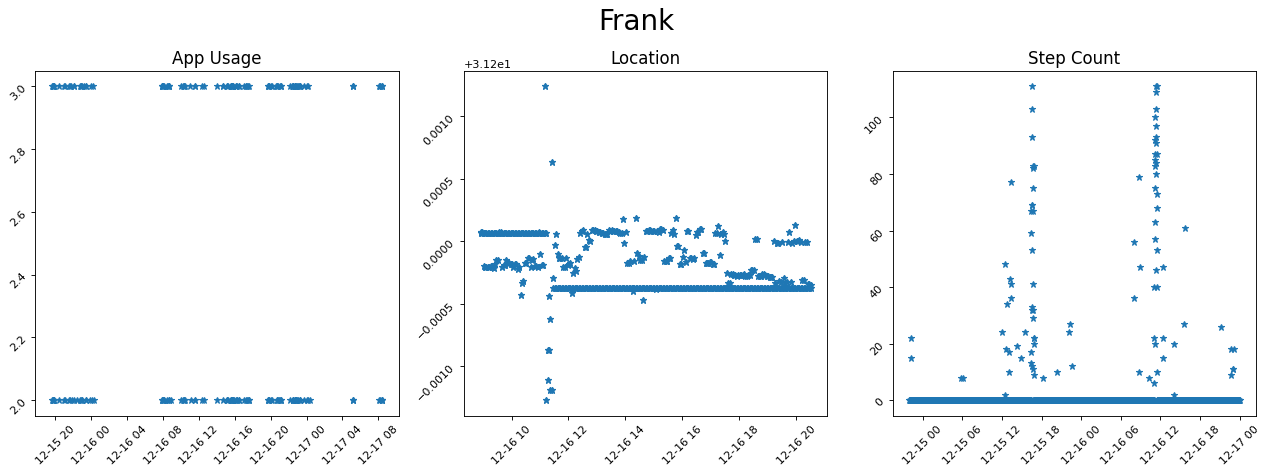

In [8]:
#Last 7 days
#NOTE: center plot blank until we get GPS data
    #uncomment code here and in AWARE_functions.py when fixed
days = 7
for ID in ID_dict.keys():
    name = ID_dict[ID]
    
    fig,ax = plt.subplots(1,3,figsize=(16, 6), dpi=80)
    fig.suptitle(name, fontsize = 25 )
    appUsageDataFrame = aware.getScreenUsageDataFrame(ID,days)
    locationDataFrame = aware.getLocationDataFrame(ID,2)
    stepCountDataFrame = aware.getStepCountDataFrame(ID,days)
    
    ax[0].plot(appUsageDataFrame['date'], appUsageDataFrame['screenTime'], '*')
    ax[0].set_title('App Usage',fontsize=15)
    ax[0].tick_params(labelrotation=45)   
    
    ax[1].plot(locationDataFrame['date'], locationDataFrame['location_lat'], '*')
    ax[1].set_title('Location',fontsize=15)
    ax[1].tick_params(labelrotation=45)
    ax[1].format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    ax[2].plot(stepCountDataFrame['date'], stepCountDataFrame['stepCount'], '*')
    ax[2].set_title('Step Count',fontsize=15)
    ax[2].tick_params(labelrotation=45)
    ax[2].format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    plt.tight_layout()
    plt.show()

In [12]:
#list of people with data missing for any table in the last n days
missing_list = []
for ID in ID_dict.keys():
    if aware.no_recent_update(ID,2):
        missing_list.append(ID_dict[ID])
print(missing_list)

['someone', 'Eura', 'Susan']
